<a href="https://colab.research.google.com/github/usmanbiu/fastai-animal-classifier/blob/master/fastai_animal_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *     

     |████████████████████████████████| 184kB 14.4MB/s 
     |████████████████████████████████| 61kB 7.4MB/s 


In [2]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 727kB 11.5MB/s 
     |████████████████████████████████| 204kB 21.7MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
     |████████████████████████████████| 1.2MB 29.5MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
Mounted at /content/gdrive


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

The first three cells are used to import all neccesary libraries for this project. Make sure you import 'fastai2' and not 'fastai' as the codes in this notebook will not work with 'fatsai'.

In [4]:
fastai2. __version__

'0.0.30'

this is to check our fastai2 version


In [5]:
animals = 'grizzly bear', 'fox','wolf'
path = 'gdrive/MyDrive/Ai_projects/animal classifier'
p_path=Path(path)
fns = get_image_files(path)
fns

(#197) [Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/9k_ (1).jpg'),Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/9k_.jpg'),Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/Z.jpg'),Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/Z (1).jpg'),Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/Z (2).jpg'),Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/2Q__.jpg'),Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/Z (3).jpg'),Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/images.jpg'),Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/images (2).jpg'),Path('gdrive/MyDrive/Ai_projects/animal classifier/fox/images (1).jpg')...]

The first line is a list of the animals we would be classifing, make sure the names are exactly the same as the ones used to name the folders containing each dataset.
The second and third line are used to initialize the path/directory to our datasets.
The last lines get all the images in each folder in our path (from the lines above). 

In [6]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

The Data loaders class is used to make our dataset which we would pass into it available as training and validation sets.


In [7]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

This is our datablock API, we are using it to pass information to our data loaders class about the kind of data we are working on ('blocks=(ImageBlock, CategoryBlock)'), how the data loaders class will get the data ('get_items=get_image_files'), how the validation set is to be created ('splitter=RandomSplitter(valid_pct=0.2, seed=42)'), and how to get the labels for our data set ('get_y=parent_label') which in this case is from the name of the folder our files are in.This can be seen as a template which will be used by our data loaders class.

In [8]:
failed = verify_images(fns)
failed

(#0) []

This line simplt checks if we have any images that werent downloaded properly.

In [9]:
dls = bears.dataloaders(path)

Here we are passing our data block to our data loaders class and also specifying the location of our datasets.

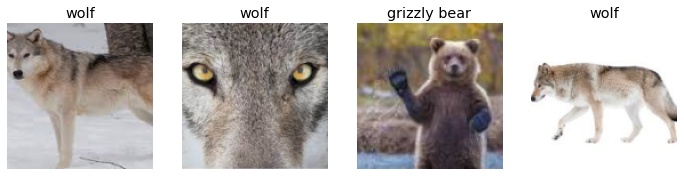

In [10]:
dls.valid.show_batch(max_n=4, nrows=1)

The code above shows a batch of four images('max_n=4')  from our validation set('dls.valid.show_batch'), all arranged in a single row('nrows=1')       

In [11]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.752469,1.366530,0.384615,00:01


epoch,train_loss,valid_loss,error_rate,time
0,1.005536,0.509893,0.256410,00:01
1,0.802184,0.124411,0.025641,00:01
2,0.631068,0.151798,0.025641,00:01
3,0.494474,0.154681,0.025641,00:01


This is where we create our learner/model, using the resnet18 architecture which is an a pretrained model with error rate as our metrics. We trained our model over 4 epochs as in the second line and our model was able to get an error rate of 0.0256 in its fourth epoch compared to 0.256 in the first epoch. This is a good result.

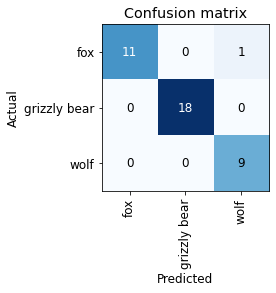

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

We want to have a look at our models performance on our validation set.our model was able to classify all images correctly asides from a Fox which was wrongly classified as a Wolf in its predictions. We would have a look at the wrongly predicted image in the next cell.

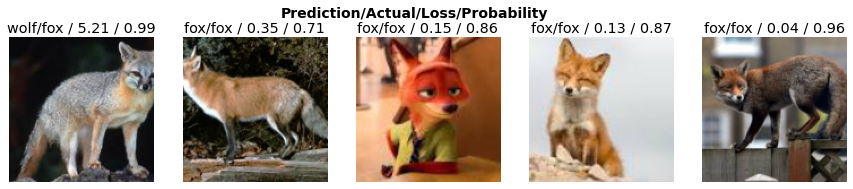

In [13]:
interp.plot_top_losses(5, nrows=1)

The code above shows us the images with the highest losses. Each image is labelled with its predicted label, actual label, loss and probability respectively. This is how we check for images that are classified wrongly. From the pictures above, only the first picture on the left was wrongly classified as a Wolf instead of a Fox. lets hace a look at some pictures of Wolves below to see if we can figure out the reason for this error.

In [14]:
cleaner = ImageClassifierCleaner(learn)
cleaner

The method used above allows us to view images from the three different categories with the highest losses, it also allows for images to be deleted or relabelled. Here we are using the method to view images of Wolves in our validation set. Theres a very obvious similarity between the image of the Fox that was classified wrongly in the cell above and the 4th and 7th images from the left, thus we cannot really fault our model. How ever we could use images that capture the complete body of the fox
 

In [15]:
learn.export()
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

We are saving our model for use in this cell, fastai will save our model as 'export.pkl' The last line simply checks to see if our model which has the file extension '.pkl' is present in our path (any file saved with the extension '.pkl' would be searched for and shown as the output). We can use this saved model to generate predictions on other images, this process is known as an 'inference'. When used this way our output will be the predicted output, the index of the predicted class among the group of probable classes and the probability of the predicted output.

In [16]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.dls.vocab

['fox', 'grizzly bear', 'wolf']

The first line loads our model into 'learn_inf' this is not neccesary since we already have our model in this notebook, conversely, it is a required step when running a new notebook which doesnt have out model already on it. The last line is used to access our data loaders for the prediction classes.

In [17]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

We would be taking advantage of the ipywidgets to creat a GUI for our application.
The first thing we would make is an upload widget using the codes in this cell.

In [18]:
btn_upload = SimpleNamespace(data = ['gdrive/MyDrive/Ai_projects/animal classifier/fox/Z.jpg'])

The cell above is used to test the 'btn_upload' button by feeding it an image to upload (copy the directory/file path to any image from your dataset and place in quotation marks in the bracket)

In [19]:
img = PILImage.create(btn_upload.data[-1])

In [20]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

The first line in the code above creates an output widget while the second and third line makes use of the output widget to display the image we fed to out upload button.

In [21]:
pred,pred_idx,probs = learn_inf.predict(img)

The codes above calls our model (learn_inf) using the 'predict' method to make a predition for img. Our output will be the predicted output, the index of the predicted class among the group of probable classes and the probability of the predicted output (pred,pred_idx,probs).

In [22]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: fox; Probability: 0.9974')

The first line above creates a label widget which is used to display our output and the second line is used to arrange the format in which our output would be displayed.

In [23]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

This cell creates another widget which we wold use as our classify button.

In [24]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [25]:
btn_upload = widgets.FileUpload()

The function above consists of the codes in the six cells above put to gether for use in our app.

In [26]:
VBox([widgets.Label('Select your image!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

This cell is used to arrange all our buttons in our GUI in a vertical box using the VBOX method.